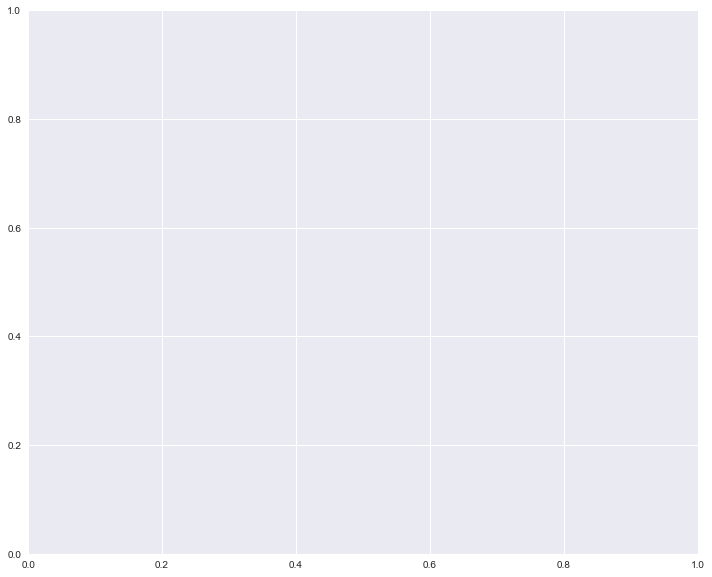

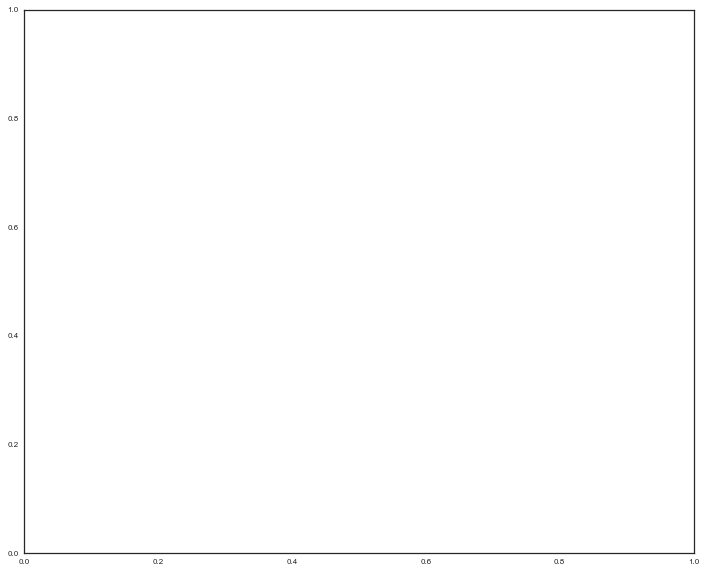

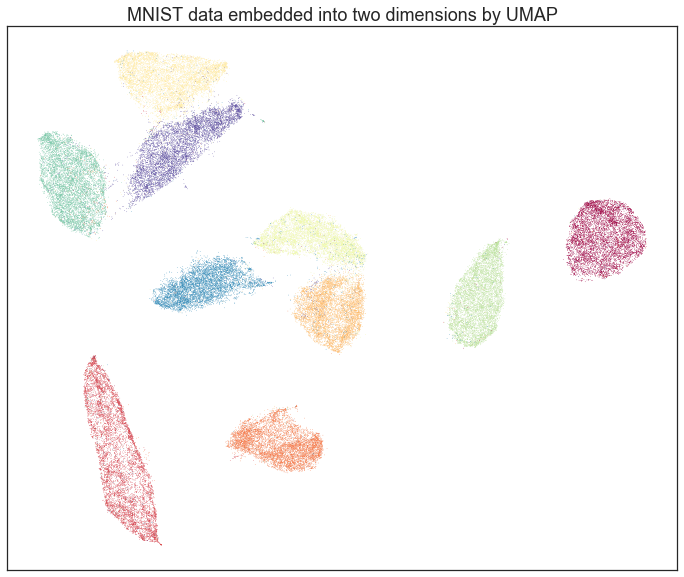

In [18]:
# testing umap
import umap
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")
mnist = fetch_mldata("MNIST original")

reducer = umap.UMAP(random_state=42)

embedding = reducer.fit_transform(mnist.data)




In [10]:
embedding = reducer.fit_transform(mnist.data)

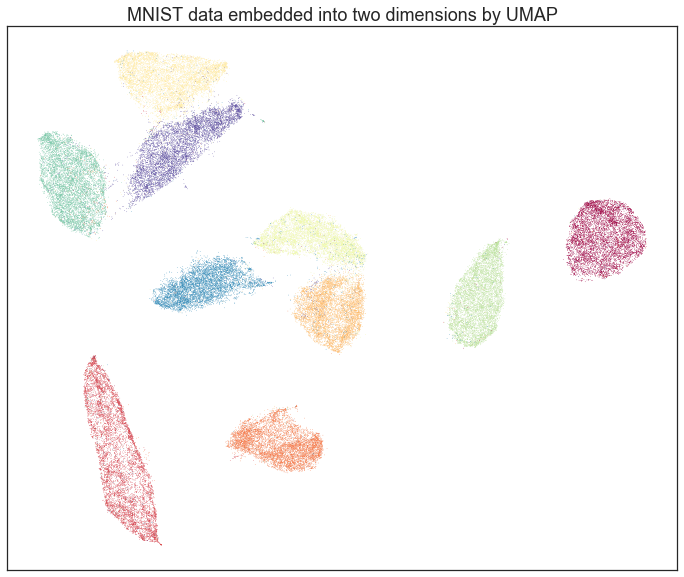

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=mnist.target, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.show()



In [49]:
import scipy
import numpy
import time


file_name='/Users/mattchurgin/Dropbox/flyimaging/180822/fly3/volumes5/unwrappedPixelAssignments'
a=scipy.io.loadmat(file_name, mdict=None, appendmat=True)

In [26]:
mnist.data.shape

(70000, 784)

In [51]:
pixelAssignments=numpy.transpose(a['pixelAssignments'])


In [56]:
pixelAssignments.shape

(537856, 50)

In [59]:
# remove NaNs

pixelAssignmentsNoNaN=pixelAssignments[~numpy.isnan(pixelAssignments).any(axis=1)]
#pixelAssignmentsNoNaN = pixelAssignments[~numpy.isnan(pixelAssignments)]
pixelAssignmentsNoNaN.shape

(484070, 50)

In [73]:
pixelAssignmentsNoNaN[0:1000,:].shape

(1000, 50)

22.852006000000983


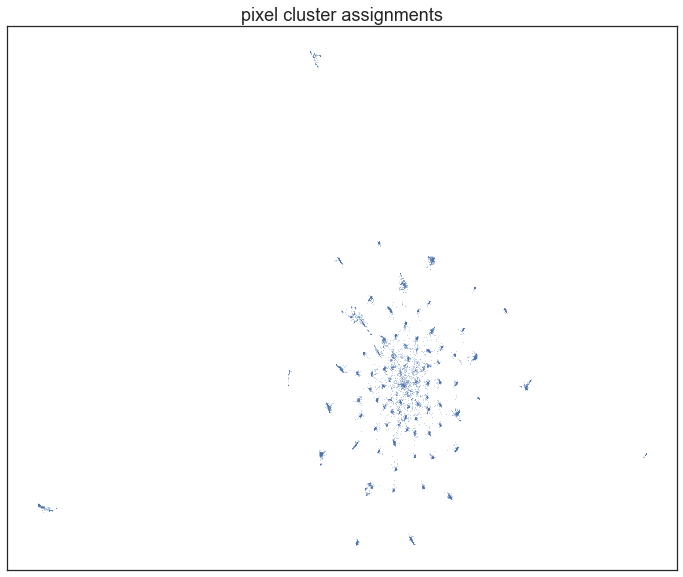

In [85]:
time_start = time.clock()

#reducer = umap.UMAP(random_state=42)
# try other distance metrics
reducer = umap.UMAP(metric='euclidean',random_state=42)

embedding = reducer.fit_transform(pixelAssignmentsNoNaN[0:10000,0:50])

time_elapsed = (time.clock() - time_start)

print(time_elapsed)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(
    embedding[:, 0], embedding[:, 1], cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("pixel cluster assignments", fontsize=18)

plt.show()



In [82]:
embedding

array([[ -0.25582272,  14.48074627],
       [ 11.48041725,   8.23998547],
       [ 11.11587143,   8.20761395],
       ..., 
       [ -6.15851402,  15.54200077],
       [ -6.17067575,  15.54794598],
       [ 11.44420052,   8.46800423]], dtype=float32)

In [96]:
# run hdbscan on the pixel cluster assignments
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)

time_start = time.clock()
cluster_labels = clusterer.fit_predict(pixelAssignments)
time_elapsed = (time.clock() - time_start)


In [97]:
cluster_labels.shape

(484070,)

2.368190994722222